In [51]:
# STEP 1 : Import standard Python packages
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
#import json

import matplotlib.pyplot as plt
%matplotlib inline

# Load an empty map
from keplergl import KeplerGl 

#Spatial Correlatio
import pysal

#plt.style.use('seaborn-whitegrid')
#import folium

In [52]:
%cd ".\Data\" 

footprint = gpd.read_file('bldgs_ChicagoLoopLi213Merge0204.geojson') # Read in Footprints from website
# website used to create geojson -https://geojson.io/

nomorph = pd.read_csv("NoMorph_NEW2.csv") # Read in No Morph dataset
OG_data = pd.read_csv("chi0_90m_coord2bldg_smc.csv") # Read in original challenge data

c:\globus\Team-Big-Duck-Energy-SMCDC-2020-Impacts-of-Urban-Weather-on-Building-Energy-Use\phil_notebook\Data


In [53]:
# Creating NoMorph_NEW2
#------------------------------------------------
#data = pd.read_csv("NoMorph_NEW.csv") # Read in Building Footprint dataset
#footprint = pd.read_csv("bldgs_ChicagoLoopLi213Merge0204.csv") # Read in Building Footprint dataset
#footprintN= footprint[['Bldg_ID','F_AREA_M2','AVGHT_M']]
#mergedStuff = pd.merge(data, footprintN, on=['Bldg_ID'], how='inner')
#mergedStuff.to_csv('NoMorph_NEW2.csv')

In [54]:
UID = nomorph.BLDGID.unique() # Get all unique building IDs
UID = UID.tolist() # Turn it into a list

In [55]:
footprint_idx = footprint.BLDGID.isin(UID)
footprint_min = footprint[footprint_idx] 



In [56]:
nomorph_select = nomorph[['BLDGID','Area','Heat_rejection','HVAC_Elec_Intensity', 'HVAC_Ngas_Intensity','Total_Elec','Total_NatG','Total_Elec_Intensity','Total_NatG_Intensity']]
footprint_select = footprint_min[['BLDGID','HGT_AGL','Shape_Area','geometry']]

In [57]:
nomorph_select = nomorph_select.drop_duplicates(subset='BLDGID', keep='first') # Remove duplicates buildings from NoMORPH

In [58]:
mergedData = pd.merge(footprint_select, nomorph_select, on=['BLDGID'], how='inner') # merge data

In [59]:
## Percentile Linearization
size = len(mergedData2.HGT_AGL)-1
helpful_percentile_linearization = mergedData2.HGT_AGL.rank(method='min').apply(lambda x: (x-1)/size)
mergedData2['HGT_AGL_Aug'] = helpful_percentile_linearization

NameError: name 'mergedData2' is not defined

In [100]:
# Load initial visualization

#Height

map_1 = KeplerGl(height=500)
map_1.add_data(OG_data, name= "Points", config=map_1)
map_1.add_data(mergedData, name= "Footprint")

map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Points': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, …

In [61]:
#saves the map (and data) to a file named chicago.html
#map_1.save_to_html(data=map_1.data, file_name='chicago2.html')

In [62]:
# Load initial visualization

#Heat Rejection

map_2 = KeplerGl(height=500, config=config.map_2)
#map_1.add_data(OG_data, name= "Points")
map_2.add_data(mergedData, name= "Footprint")

map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Footprint': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2…

In [63]:
# Load initial visualization
#Electricity Consumption
map_2 = KeplerGl(height=500, config=config.map_22)
map_2.add_data(mergedData, name= "Footprint")

map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Footprint': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2…

In [64]:
# Load initial visualization
#Gas Consumption
map_3 = KeplerGl(height=500, config=config.map_3)
map_3.add_data(mergedData, name= "Footprint")

map_3

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Footprint': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2…

In [65]:
# Load initial visualization
#Electricity Intensity 
map_4 = KeplerGl(height=500, config=config.map_4)
map_4.add_data(mergedData, name= "Footprint")

map_4

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Footprint': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2…

In [66]:
# Load initial visualization
#Gas Intensity
map_5 = KeplerGl(height=500, config=config.map_5)
map_5.add_data(mergedData, name= "Footprint")

map_5

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Footprint': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2…

# Correlations

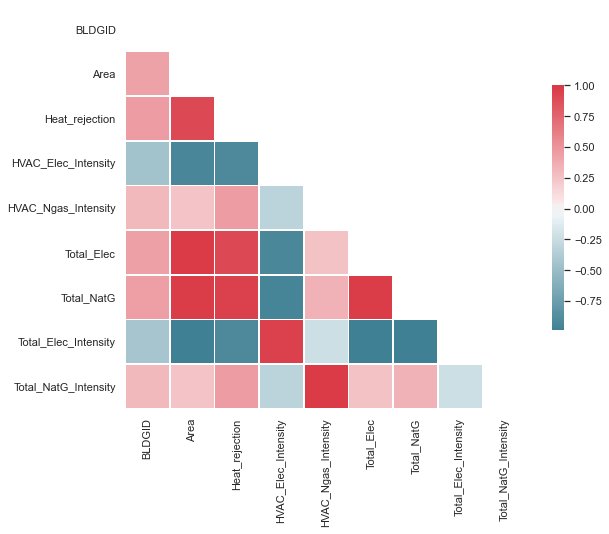

In [67]:
sns.set(style="white") # set style
d = nomorph_select # set data

# Compute the correlation matrix
corr = d.corr(method='spearman')
#corr = d.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [68]:
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,BLDGID,Area,Heat_rejection,HVAC_Elec_Intensity,HVAC_Ngas_Intensity,Total_Elec,Total_NatG,Total_Elec_Intensity,Total_NatG_Intensity
BLDGID,1.00,0.43,0.46,-0.45,0.31,0.43,0.45,-0.43,0.31
Area,0.43,1.00,0.91,-0.93,0.25,1.00,0.98,-0.99,0.25
Heat_rejection,0.46,0.91,1.00,-0.91,0.46,0.91,0.95,-0.91,0.46
HVAC_Elec_Intensity,-0.45,-0.93,-0.91,1.00,-0.31,-0.93,-0.95,0.95,-0.31
HVAC_Ngas_Intensity,0.31,0.25,0.46,-0.31,1.00,0.26,0.35,-0.22,1.00
Total_Elec,0.43,1.00,0.91,-0.93,0.26,1.00,0.98,-0.98,0.26
Total_NatG,0.45,0.98,0.95,-0.95,0.35,0.98,1.00,-0.98,0.35
Total_Elec_Intensity,-0.43,-0.99,-0.91,0.95,-0.22,-0.98,-0.98,1.00,-0.22
Total_NatG_Intensity,0.31,0.25,0.46,-0.31,1.00,0.26,0.35,-0.22,1.00


# Spatial Correlations

In [69]:
mergedData2 = pd.merge(mergedData, OG_data, on=['BLDGID'], how='inner') # merge data to include Lat and Loc.

In [70]:
mergedData2['Log_TElec']=np.log(mergedData2.Total_Elec)
mergedData2['Log_TGas']=np.log(mergedData2.Total_NatG)
mergedData2['Log_Area']=np.log(mergedData2.Area)
mergedData2['Log_IElec']=np.log(mergedData2.Total_Elec_Intensity)
mergedData2['Log_IGas']=np.log(mergedData2.Total_NatG_Intensity)
mergedData2['Log_HGT']=np.log(mergedData2.HGT_AGL)

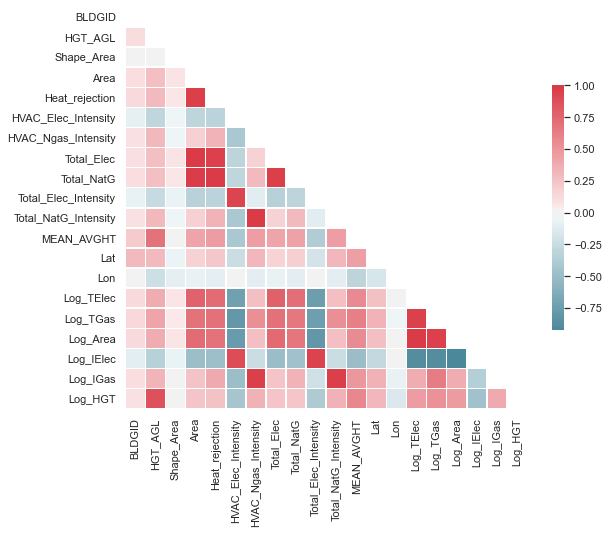

In [71]:
sns.set(style="white") # set style
d = mergedData2 # set data
#d = mergedData2[['HGT_AGL', "Area","Total_Elec",'Total_NatG','Total_Elec_Intensity','Total_NatG_Intensity','Log_HGT']] # set data

# Compute the correlation matrix
#corr = d.corr(method='spearman')
corr = d.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [72]:
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,BLDGID,HGT_AGL,Shape_Area,Area,Heat_rejection,HVAC_Elec_Intensity,HVAC_Ngas_Intensity,Total_Elec,Total_NatG,Total_Elec_Intensity,Total_NatG_Intensity,MEAN_AVGHT,Lat,Lon,Log_TElec,Log_TGas,Log_Area,Log_IElec,Log_IGas,Log_HGT
BLDGID,1.00,0.12,0.01,0.11,0.12,-0.08,0.10,0.10,0.11,-0.07,0.10,0.21,0.29,0.03,0.13,0.14,0.13,-0.11,0.11,0.09
HGT_AGL,0.12,1.00,0.01,0.27,0.30,-0.29,0.31,0.27,0.28,-0.26,0.31,0.69,0.30,-0.22,0.38,0.42,0.38,-0.34,0.33,0.87
Shape_Area,0.01,0.01,1.00,0.08,0.06,-0.04,-0.04,0.08,0.06,-0.06,-0.04,-0.01,-0.05,-0.09,0.07,0.05,0.07,-0.07,-0.03,-0.00
Area,0.11,0.27,0.08,1.00,0.96,-0.30,0.18,1.00,0.97,-0.33,0.18,0.43,0.18,-0.07,0.77,0.69,0.73,-0.49,0.25,0.24
Heat_rejection,0.12,0.30,0.06,0.96,1.00,-0.32,0.34,0.96,0.99,-0.32,0.34,0.46,0.23,-0.09,0.73,0.70,0.69,-0.47,0.39,0.26
HVAC_Elec_Intensity,-0.08,-0.29,-0.04,-0.30,-0.32,1.00,-0.41,-0.30,-0.29,0.93,-0.41,-0.41,-0.24,-0.00,-0.72,-0.79,-0.77,0.90,-0.48,-0.43
HVAC_Ngas_Intensity,0.10,0.31,-0.04,0.18,0.34,-0.41,1.00,0.18,0.29,-0.12,1.00,0.46,0.32,-0.10,0.27,0.53,0.27,-0.24,0.97,0.35
Total_Elec,0.10,0.27,0.08,1.00,0.96,-0.30,0.18,1.00,0.97,-0.34,0.18,0.42,0.17,-0.07,0.78,0.70,0.74,-0.49,0.24,0.25
Total_NatG,0.11,0.28,0.06,0.97,0.99,-0.29,0.29,0.97,1.00,-0.30,0.29,0.43,0.19,-0.10,0.71,0.67,0.67,-0.45,0.34,0.23
Total_Elec_Intensity,-0.07,-0.26,-0.06,-0.33,-0.32,0.93,-0.12,-0.34,-0.30,1.00,-0.12,-0.37,-0.19,-0.01,-0.75,-0.73,-0.80,0.94,-0.20,-0.39


In [73]:
w_LOC = pysal.lib.weights.KNN.from_dataframe(mergedData2,k=10)

In [74]:
local_morans = pysal.explore.esda.moran.Moran_Local(mergedData2.Total_Elec,w_LOC,permutations=99999)

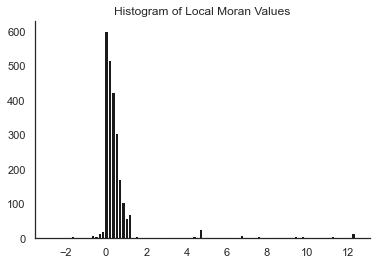

In [75]:
plt.hist(local_morans.Is, color='k',bins=90)    
sns.despine()   
plt.title("Histogram of Local Moran Values")  
plt.show()

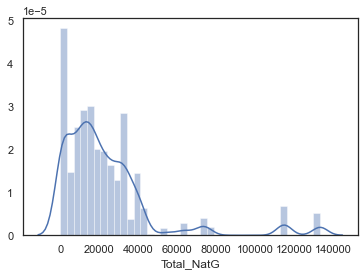

In [76]:
sns.distplot(mergedData2.Total_NatG);
#BLDGID','Area','Total_Elec','Total_NatG','Total_Elec_Intensity','Total_NatG_Intensity'

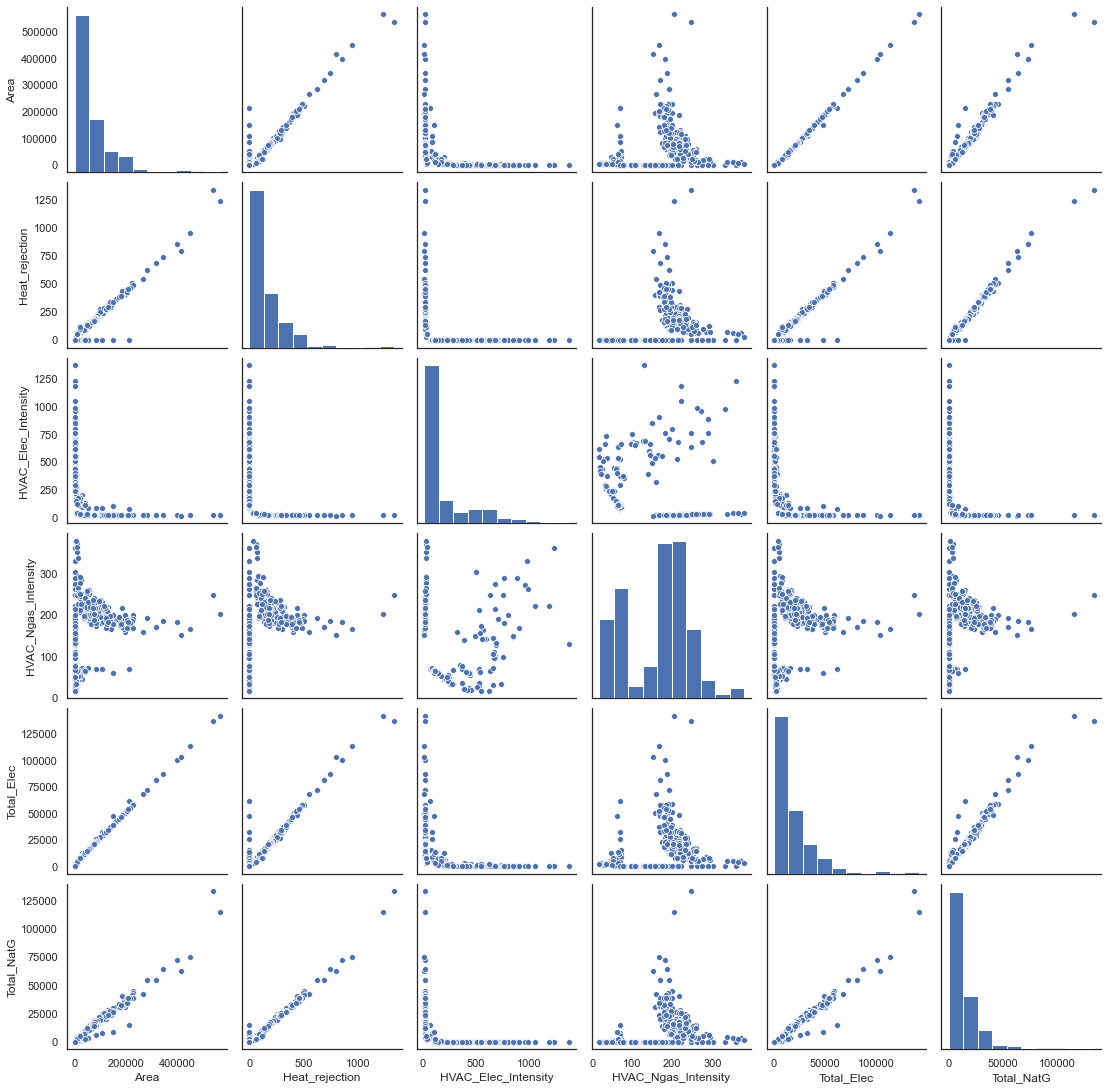

In [77]:
sns.pairplot(nomorph_select[['Area', 'Heat_rejection', 'HVAC_Elec_Intensity',
       'HVAC_Ngas_Intensity', 'Total_Elec', 'Total_NatG']])

# Linking with Energy Benchmarking Data

In [78]:
OG_data = pd.read_csv("chi0_90m_coord2bldg_smc.csv") # Read in original challenge data
ChicBld = pd.read_csv("Chicago_Energy_Benchmarking.csv") # Read in energy benchmarking dataset

# STEP 2: Group buildings by unique Lat/Long 
bdata= OG_data.groupby(['Lat','Lon'])
keysOG = [key for key, _ in bdata] # get unique lat/lon combinations

# -----------------------------------------------------------------------
# Round the Lon/Lat
ChicBld['Latitude'] = round(ChicBld['Latitude'], 6) 
ChicBld['Longitude'] = round(ChicBld['Longitude'], 6) 

# Find unique Lat/Lon combinations in benchmark dataset
cdata= ChicBld.groupby(['Latitude','Longitude']) # Set of unique Long/Lat Coordinates
keysBenchmark = [key for key, _ in cdata] # get unique lat/lon combinations



In [79]:
#Weed out out of bounds Long/Lats from Footprint
Latmin=OG_data.Lat.min()
Latmax=OG_data.Lat.max()
Lonmin=OG_data.Lon.min()
Lonmax=OG_data.Lat.max()
new_list = []

for i in range(len(keysBenchmark)):
    if (keysBenchmark[i][0]<Latmin) or (keysBenchmark[i][0]>Latmax) or (keysBenchmark[i][1]<Lonmin) or (keysBenchmark[i][1]>Lonmax):
        continue
    else:
        new_list.append(keysBenchmark[i])

# Nearest Location Algorithm

KeyError: 'Column not found: 0'

In [80]:
#import numpy as np
import pyproj
import scipy
from scipy import spatial
#from geopy.distance import distance

c1 = np.array(keysOG)
c2 = np.array(new_list)

# create projections, using a mean (lat, lon) for aeqd
lat_0, lon_0 = np.mean(np.append(c1[:,0], c2[:,0])), np.mean(np.append(c1[:,1], c2[:,1]))
proj = pyproj.Proj(proj='aeqd', lat_0=lat_0, lon_0=lon_0, x_0=lon_0, y_0=lat_0)
WGS84 = pyproj.Proj(init='epsg:3435')

# transform coordinates
projected_c1 = pyproj.transform(WGS84, proj, c1[:,1], c1[:,0])
projected_c2 = pyproj.transform(WGS84, proj, c2[:,1], c2[:,0])
projected_c1 = np.column_stack(projected_c1)
projected_c2 = np.column_stack(projected_c2)

# calculate pairwise distances in km with both methods
sc_dist = spatial.distance.cdist(projected_c1, projected_c2)
#geo_distances = []
#for c in c1:
#    this_row = [distance(c, x).km for x in c2]
#    geo_distances.append(this_row)

print("scipy\n")
print(sc_dist/1000)
#print("\n")
#print("geopy\n")
#print(np.array(geo_distances))

#'''NOTE: Locations with duplicated building allocations 145 ,290, 317, 355, 525, 537'''

# COunt occurances in list
#from collections import Counter
#Counter(keyz)

scipy

[[1.45824751e-06 3.89853671e-06 5.80603865e-07 ... 6.60678726e-06
  6.45019894e-06 6.53348901e-06]
 [5.28658894e-06 7.71920562e-06 4.35996652e-06 ... 8.58314313e-06
  8.22308458e-06 8.39599554e-06]
 [3.54917918e-06 5.97937592e-06 2.62004741e-06 ... 7.41381065e-06
  7.12269537e-06 7.26554801e-06]
 ...
 [6.03387141e-06 6.80713414e-06 5.72854962e-06 ... 2.11783313e-06
  1.60043295e-06 1.83494769e-06]
 [5.98174791e-06 6.63214351e-06 5.73060655e-06 ... 1.76549942e-06
  1.25012957e-06 1.48392856e-06]
 [6.23750853e-06 6.86160230e-06 5.98722229e-06 ... 1.76398232e-06
  1.24087581e-06 1.47559615e-06]]


In [81]:
# Ensure that a single building is not assigned to multiple locations
#----------------------------------------------------------------------

#sc_dist[0].argmin()
keyz=[]  # used to keep track of locations that have already been selected
for i in range(len(sc_dist)):
    sc_dist[i][keyz]=9999 # assign a large number so that it will not be chosen.
    keyz.append(sc_dist[i].argmin())

#keyz

In [82]:
# Count occurances in list
# --------------------------------------------
#from collections import Counter
#Counter(keyz)

In [83]:
templist=[]
templist1=[]
templist2=[]
templist3=[]
templist4=[]

for i in range(len(keyz)):
    templist.append(ChicBld['Property Name'].iloc[keyz[i]])
    templist1.append(ChicBld['Primary Property Type'].iloc[keyz[i]])
    templist2.append(ChicBld['Year Built'].iloc[keyz[i]])
    templist3.append(ChicBld[ '# of Buildings'].iloc[keyz[i]])
    templist4.append(ChicBld['ENERGY STAR Score'].iloc[keyz[i]])
#len(templist)
    

In [84]:
Lat=[]
Lon=[]
for i in range(len(keysOG)):
    Lat.append(keysOG[i][0])
    Lon.append(keysOG[i][1])

Fun = pd.DataFrame()
Fun['Lat'] = Lat
Fun['Lon'] = Lon
Fun['Building'] = keysOG
Fun['Property Name'] = templist
Fun['Primary Property Type'] = templist1
Fun['Year Built'] = templist2
Fun['# of Buildings'] = templist3
Fun['ENERGY STAR Score'] = templist4


In [85]:
CombineData = pd.merge(OG_data, Fun,  how='left', left_on=['Lat','Lon'], right_on = ['Lat','Lon'])


In [86]:
#CombineData['ENERGY STAR Score'].fillna(0, inplace=True)
CombineData1 = CombineData[CombineData['ENERGY STAR Score'].notna()] # just for visualization
CombineData.head(20)

,BLDGID,MEAN_AVGHT,Lat,Lon,Building,Property Name,Primary Property Type,Year Built,# of Buildings,ENERGY STAR Score
0,1,1.74,41.867863,-87.628662,"(41.867863, -87.628662)",201 East Chestnut Condominium Association,Multifamily Housing,1967,1,60.0
1,2,2.17,41.867859,-87.629822,"(41.867859, -87.62982199999999)",#1976 Lincoln Park,Retail Store,2003,1,29.0
2,4,2.97,41.867859,-87.629822,"(41.867859, -87.62982199999999)",#1976 Lincoln Park,Retail Store,2003,1,29.0
3,5,3.03,41.867863,-87.628662,"(41.867863, -87.628662)",201 East Chestnut Condominium Association,Multifamily Housing,1967,1,60.0
4,10,3.73,41.867870,-87.626404,"(41.86787, -87.62640400000001)",The Buckingham Condominium Association,Multifamily Housing,1981,1,13.0
5,11,8.94,41.867859,-87.629822,"(41.867859, -87.62982199999999)",#1976 Lincoln Park,Retail Store,2003,1,29.0
6,12,8.66,41.867863,-87.628662,"(41.867863, -87.628662)",201 East Chestnut Condominium Association,Multifamily Housing,1967,1,60.0
7,14,17.77,41.867870,-87.626404,"(41.86787, -87.62640400000001)",The Buckingham Condominium Association,Multifamily Housing,1981,1,13.0
8,15,8.31,41.867878,-87.625244,"(41.867878000000005, -87.625244)",Lake Shore Condominium Assn.,Multifamily Housing,1961,1,NaN
9,17,9.03,41.867859,-87.629822,"(41.867859, -87.62982199999999)",#1976 Lincoln Park,Retail Store,2003,1,29.0


In [87]:
#CombineData.to_csv('BenchmarkCombined.csv')

In [88]:
mergedData4 = pd.merge(mergedData2, CombineData1, on=['BLDGID'], how='inner') # merge data to include Lat and Loc.

Index(['BLDGID', 'HGT_AGL', 'Shape_Area', 'geometry', 'Area', 'Heat_rejection',
       'HVAC_Elec_Intensity', 'HVAC_Ngas_Intensity', 'Total_Elec',
       'Total_NatG', 'Total_Elec_Intensity', 'Total_NatG_Intensity',
       'MEAN_AVGHT_x', 'Lat_x', 'Lon_x', 'Log_TElec', 'Log_TGas', 'Log_Area',
       'Log_IElec', 'Log_IGas', 'Log_HGT', 'MEAN_AVGHT_y', 'Lat_y', 'Lon_y',
       'Building', 'Property Name', 'Primary Property Type', 'Year Built',
       '# of Buildings', 'ENERGY STAR Score'],
      dtype='object')

In [89]:
# Load initial visualization

#Energy Star Rating

map_1 = KeplerGl(height=500)
map_1.add_data(mergedData4[['Year Built','Property Name', 'Primary Property Type','ENERGY STAR Score','HGT_AGL', 'geometry']], name= "Footprint")

map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Footprint': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2…

# Clustering

In [90]:
import hdbscan


In [91]:
#ClusData = mergedData2[['Total_Elec', 'Total_NatG',]]
ClusData = mergedData2[['HGT_AGL', 'Shape_Area', 'Area', 'Heat_rejection',
       'HVAC_Elec_Intensity', 'HVAC_Ngas_Intensity', 'Total_Elec',
       'Total_NatG', 'Total_Elec_Intensity', 'Total_NatG_Intensity',
       'MEAN_AVGHT']]
clusterer = hdbscan.HDBSCAN(min_cluster_size=65, gen_min_span_tree=True)
clusterer.fit(ClusData)



HDBSCAN(gen_min_span_tree=True, min_cluster_size=65)

In [92]:
#clusterer.labels_
clusterer.labels_.max()

8

In [93]:
len(ClusData)

2506

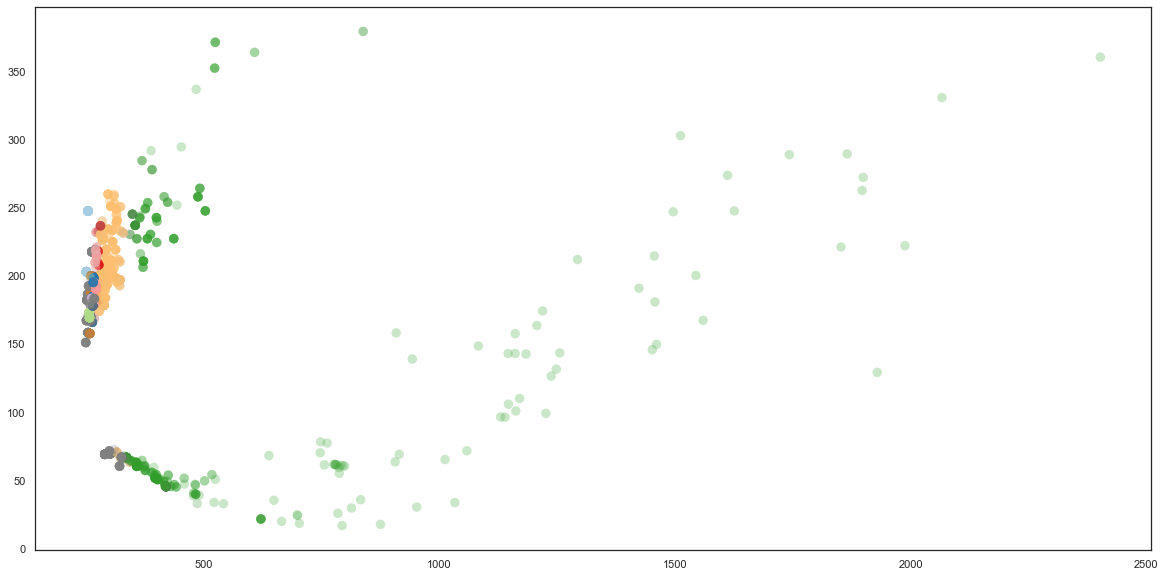

In [94]:
plt.figure(figsize=(20,10))
color_palette = sns.color_palette('Paired', 10)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(ClusData.Total_Elec_Intensity,ClusData.Total_NatG_Intensity, s=90, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [95]:
mergedData['Cluster'] = clusterer.labels_

In [96]:
# Load initial visualization

#Clusters

map_1 = KeplerGl(height=500)
map_1.add_data(mergedData, name= "Footprint")

map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Footprint': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2…

In [97]:
X = ClusData
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

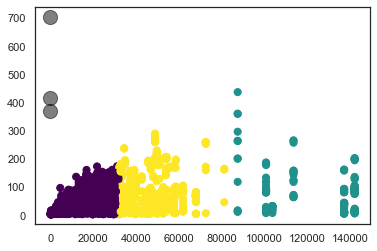

In [98]:
plt.scatter(ClusData.Total_Elec,ClusData.HGT_AGL, c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [99]:
# Load initial visualization

#Energy Star Rating
mergedData4['cluster'] = y_kmeans
map_1 = KeplerGl(height=500)
map_1.add_data(mergedData4[['Year Built','Property Name', 'Primary Property Type','ENERGY STAR Score','HGT_AGL', 'geometry','cluster']], name= "Footprint")

map_1

ValueError: Length of values does not match length of index